# **Map SalishSea**

In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import os
from matplotlib import pyplot as plt, animation, rc
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors
from cartopy import crs, feature
import cmocean


cmap = cmocean.cm.deep

## Paths

In [2]:
# Define paths
paths = {
    'NEMO': '/results2/SalishSea/nowcast-green.201905/',
    'coords': '/Users/jvalenti/MOAD/SSC_masks/coordinates_seagrid_SalishSea201702.nc',
    'mask': '/Users/jvalenti/MOAD/SSC_masks/mesh_mask201702.nc',
    'out': '/Users/jvalenti/MOAD/analysis-jose/notebooks/results/',
}

## Simulation

In [3]:
coords = xr.open_dataset(paths['coords'], decode_times=False)
mask = xr.open_dataset(paths['mask'])

/Users/jvalenti/conda_envs/parcels/lib/python3.7/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/jvalenti/conda_envs/parcels/lib/python3.7/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/jvalenti/conda_envs/parcels/lib/python3.7/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


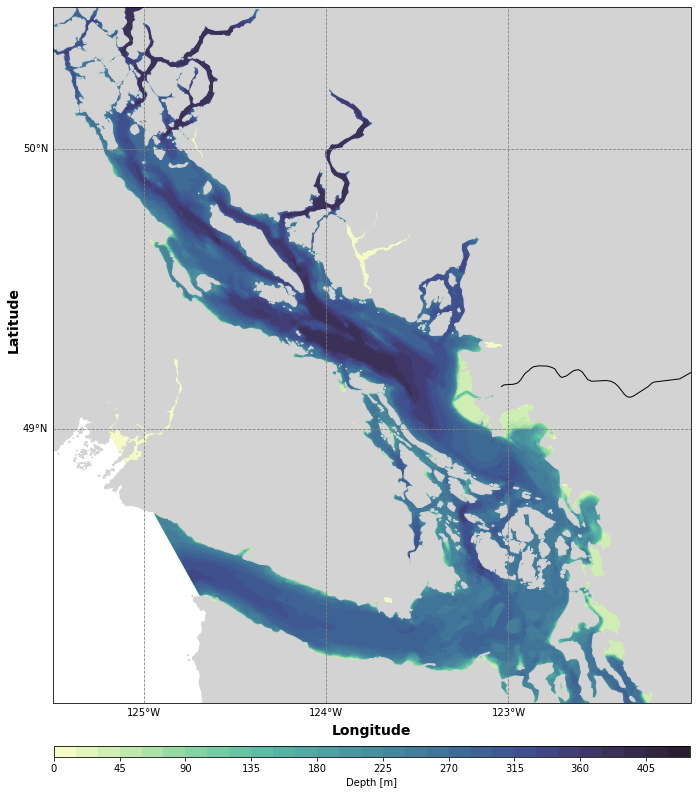

In [10]:
# Make map
blevels = list(np.arange(0,450,15))
fig, ax = plt.subplots(figsize=(38, 16), subplot_kw={'projection': crs.Mercator()})
ax.set_extent([-125.5, -122, 48, 50.5], crs=crs.PlateCarree())
ax.add_feature(feature.GSHHSFeature('high', facecolor='lightgray',edgecolor='lightgray'),zorder=2)
ax.add_feature(feature.RIVERS, edgecolor='k',zorder=5)
#ax.add_feature(feature.OCEAN,zorder=1)
im=ax.contourf(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:]*10,zorder=1,transform=crs.PlateCarree(),cmap=cmap,levels=blevels)
#plt.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:]*10,zorder=1,transform=crs.PlateCarree(),colors='w',levels=blevels,linewidths=0.05)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)

gl = ax.gridlines(
    linestyle='--', color='gray', draw_labels=True,
    xlocs=range(-125, -121), ylocs=range(47, 52),zorder=5)
gl.top_labels, gl.right_labels = False, False

cbar = fig.colorbar(im, location='bottom',aspect=60,shrink=0.3,pad=0.05)

cbar.set_label('Depth [m]')

ax.text(-0.05, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=14,weight="bold")
ax.text(0.5, -0.05, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=14,weight="bold")
plt.savefig("/Users/jvalenti/Desktop/baty.pdf")

In [5]:
states_provinces = feature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

/Users/jvalenti/conda_envs/parcels/lib/python3.7/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/jvalenti/conda_envs/parcels/lib/python3.7/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/jvalenti/conda_envs/parcels/lib/python3.7/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


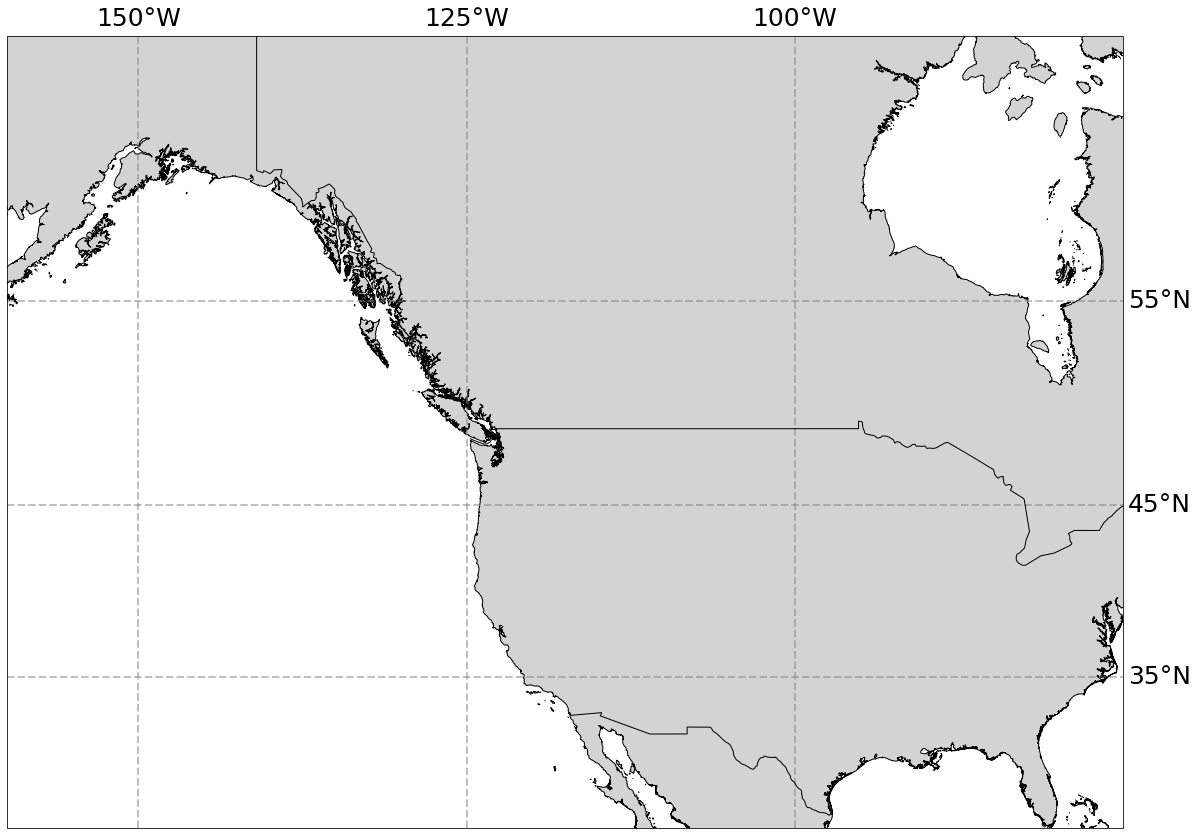

In [7]:
# Make map
fig, ax = plt.subplots(figsize=(20, 16), subplot_kw={'projection': crs.Mercator()})
ax.set_extent([-160, -75, 65, 25], crs=crs.PlateCarree())
ax.add_feature(feature.GSHHSFeature('intermediate', edgecolor='k', facecolor='lightgray'))
#ax.add_feature(feature.OCEAN,zorder=1)
ax.add_feature(feature.BORDERS,zorder=3)
gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, xlocs=np.linspace(-150,-50,5), ylocs=np.linspace(55,35,3),
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 25}
gl.ylabel_style = {'size': 25}
gl.bottom_labels, gl.left_labels = False, False
plt.savefig("/Users/jvalenti/Desktop/map.pdf")